In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
#from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("C:\\Users\\Abilash Pandian\\OneDrive\\Desktop\\DATASETS\\song_data.csv")
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


dropping the song_name


In [6]:
df.drop(['song_name'], axis=1, inplace=True)




fixing the target and features

checking the unique values in the feature

In [7]:
target='song_popularity'
features = [i for i in df.columns if i not in [target]]
original_df=df.copy(deep=True)
df.info()

df.nunique().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [8]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; 

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print("Numerical features: ",nf)
print("\nCategorical features: ",cf)
print("\n\ntotal numerical features: ",len(nf),"\ntotal categorical features",len(cf))

Numerical features:  ['danceability', 'energy', 'speechiness', 'audio_valence', 'liveness', 'acousticness', 'instrumentalness', 'loudness', 'song_duration_ms', 'tempo']

Categorical features:  ['audio_mode', 'time_signature', 'key']


total numerical features:  10 
total categorical features 3


EDA


1.target variable distribution

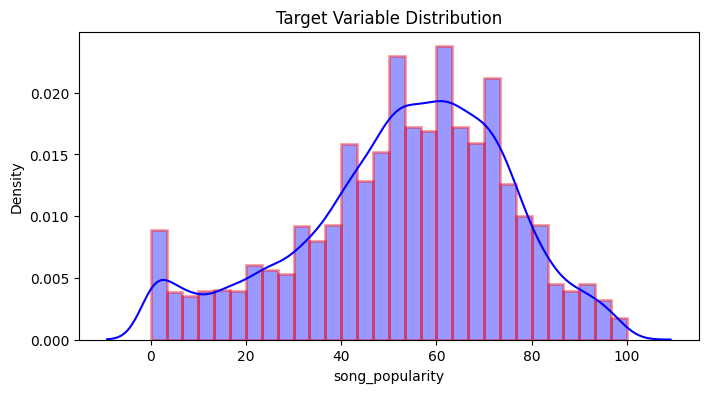

In [9]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='b',hist_kws=dict(edgecolor="red", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

INFERENCE : TARGET FEATURE IS NORMALLY DISTRIBUTED

2.removal of duplicates and null values

In [10]:
counter=0
rs,cs=original_df.shape
df.drop_duplicates(inplace=True)
if df.shape==(rs,cs):
    print('No duplicates')
else:
    print("Number of duplicates",rs-df.shape[0])
nvc=pd.DataFrame(df.isnull().sum().sort_values(),columns=['total null values'])
nvc['Percentage'] = round(nvc['total null values']/df.shape[0],3)*100
print(nvc)

Number of duplicates 3911
                  total null values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


3.coverting categorical to numerics


In [11]:
df3 = df.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
print("features modified:")
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

features modified:
audio_mode
time_signature
key


(14924, 27)

check for outliers

                                                                     Outliers                                                                     


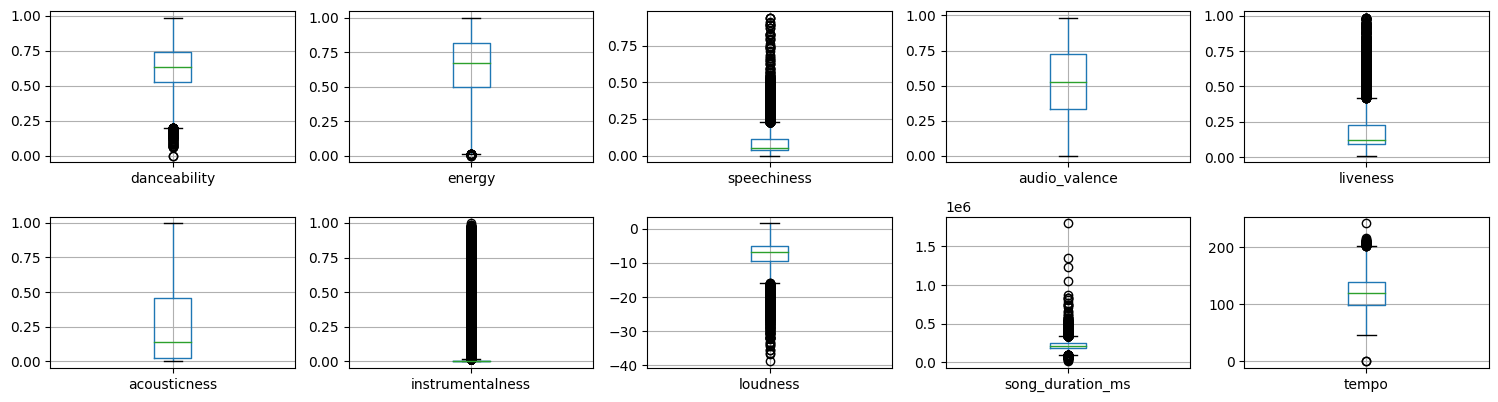

In [12]:
print('\033[1mOutliers'.center(150))
n=5
plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

treating the outliers

In [13]:
df1 = df3.copy()
features1=nf
for i in features1:
    Q1=df1[i].quantile(0.25)
    Q3=df1[i].quantile(0.75)
    IQR=Q3-Q1
    df1=df1[df1[i] <= (Q3+(1.5*IQR))]
    df1=df1[df1[i] >= (Q1-(1.5*IQR))]
    df1=df1.reset_index(drop=True)
print("before removal: ",df3.shape[0])
print("after removal: ",df1.shape[0])


before removal:  14924
after removal:  8950


In [14]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('\nTraining set: ',Train_X.shape,Train_Y.shape,'\nTesting set: ', Test_X.shape,'', Test_Y.shape)


Training set:  (11939, 13) (11939,) 
Testing set:  (2985, 13)  (2985,)


In [15]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04,1.193900e+04
mean,1.047454e-16,-1.304854e-16,5.415813e-17,2.591853e-16,-2.767421e-17,5.951443e-17,1.699137e-16,-2.666246e-16,5.475327e-17,9.373522e-17,-8.927164e-17,6.010957e-16,-7.677361e-17
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-3.306587e+00,-8.998902e-01,-3.954006e+00,-2.890444e+00,-3.806744e-01,-1.475013e+00,-1.171904e+00,-7.217560e+00,-1.298903e+00,-9.629503e-01,-4.171454e+00,-1.217299e+01,-2.131996e+00
25%,-5.629452e-01,-8.228019e-01,-6.327266e-01,-6.521522e-01,-3.806744e-01,-9.193029e-01,-6.020587e-01,-4.272245e-01,-1.298903e+00,-6.041379e-01,-7.847161e-01,1.486147e-01,-7.799360e-01
50%,-1.094086e-01,-4.464126e-01,7.581289e-02,1.467057e-01,-3.805775e-01,-8.573738e-02,-4.007734e-01,2.286785e-01,7.698806e-01,-4.400820e-01,-3.918472e-02,1.486147e-01,7.084248e-03
75%,4.114119e-01,6.217871e-01,7.274162e-01,8.011373e-01,-3.595167e-01,7.478282e-01,3.002547e-01,6.639596e-01,7.698806e-01,1.403498e-01,6.468012e-01,1.486147e-01,8.102485e-01
max,2.530966e+01,2.445788e+00,2.289999e+00,1.604509e+00,3.804694e+00,1.581394e+00,5.596140e+00,2.301481e+00,7.698806e-01,8.064923e+00,4.171377e+00,3.229016e+00,1.831357e+00



                                          Standardardization on Testing set                                          


,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000,2985.000000
mean,0.033849,0.043260,-0.014608,-0.039826,0.029350,-0.009781,0.023911,0.000824,0.042168,-0.046498,-0.009907,0.018588,-0.025867
std,0.990361,1.006495,0.999288,1.003580,1.046129,0.991136,1.034838,0.992111,0.988049,0.965371,0.999442,0.871199,0.999779
min,-2.614727,-0.899889,-3.558615,-2.879747,-0.380674,-1.475013,-1.138588,-7.724146,-1.298903,-0.744209,-2.394663,-9.092589,-2.039168
25%,-0.511383,-0.810205,-0.651705,-0.701799,-0.380674,-0.919303,-0.600671,-0.415299,-1.298903,-0.613732,-0.798212,0.148615,-0.820296
50%,-0.098522,-0.372512,0.050508,0.092546,-0.380613,-0.085737,-0.400773,0.239362,0.769881,-0.462148,-0.039942,0.148615,-0.053456
75%,0.445194,0.725920,0.714764,0.756004,-0.358509,0.747828,0.328018,0.681351,0.769881,0.054005,0.642412,0.148615,0.786032
max,16.252858,2.445788,2.214084,1.613535,3.729130,1.581394,5.519791,2.038126,0.769881,7.374161,3.115294,3.229016,1.839429


In [16]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,3,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.07163306 -0.71831881  1.08708676 -1.75520859 -1.60813404  0.06367103
 -0.61956935  1.57722155  0.1080315  -0.46303627 -0.35287893  0.34955858
 -1.54745972]
The Intercept of the Regresion Model was found to be  48.59016668062652


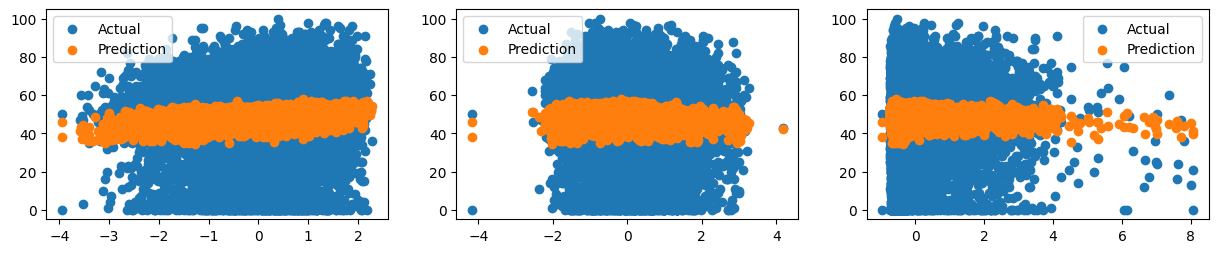



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.021778000817433862
Residual Sum of Squares (RSS) on Training set  ---> 4832265.722190002
Mean Squared Error (MSE) on Training set       ---> 404.7462703903176
Root Mean Squared Error (RMSE) on Training set ---> 20.11830684700672

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0271820279370345
Residual Sum of Squares (RSS) on Training set  ---> 1222707.9778343705
Mean Squared Error (MSE) on Training set       ---> 409.61741300983937
Root Mean Squared Error (RMSE) on Training set ---> 20.239007214036942

--------------------Residual Plots--------------------


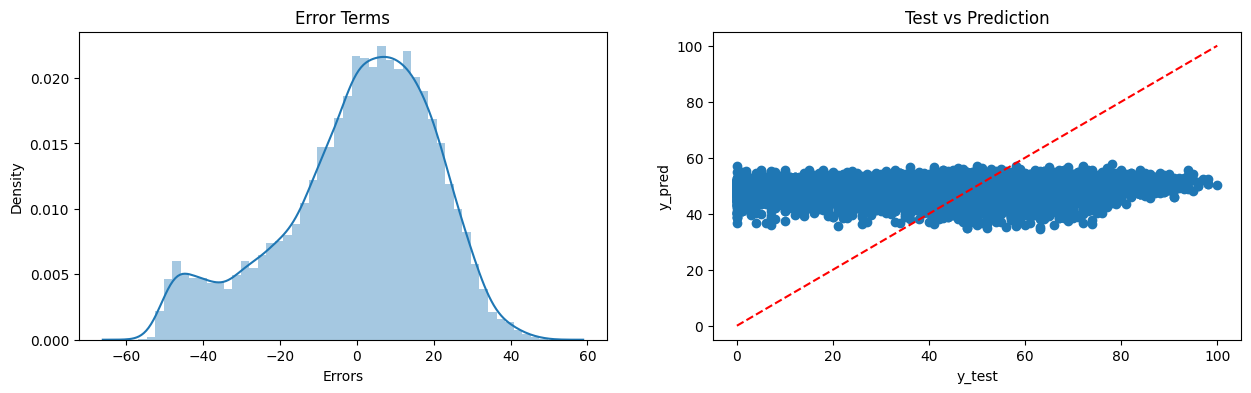

[47.83074133 45.58227974 46.84313251 ... 50.43853444 53.50380359
 45.65028775]


In [17]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)
#print(Test_X_std)
print(pred2)



In [34]:
#print(Test_X_std)
"""d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)"""
user_input=[[0.12635,0.856234,1.235698,-0.259841,0.526398,2.321456,-0.235418,1.23654,0.852416,-0.213548,1.63842,0.632589,1.235694]]
userinput=pd.DataFrame(data=user_input)
preduser=MLR.predict(userinput)
print(preduser)

[49.08464378]


In [32]:
import pickle
pickle.dump(MLR, open('model1.pk1','wb'))